In [1]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("omic_data.csv")

# Display the first few rows of the data to get an overview
print(data.head())


    UKHSA_region specimen_date    n  percent                         sgtf  \
0  East Midlands    01/11/2021  874   100.00  Cases with confirmed S-gene   
1  East Midlands    02/11/2021  724    99.86  Cases with confirmed S-gene   
2  East Midlands    02/11/2021    1     0.14    Cases with confirmed SGTF   
3  East Midlands    03/11/2021  757   100.00  Cases with confirmed S-gene   
4  East Midlands    04/11/2021  598   100.00  Cases with confirmed S-gene   

   total   conf_low  conf_high  
0    874  99.454454  100.00000  
1    725  99.109120   99.99280  
2    725   0.007200    0.89088  
3    757  99.370567  100.00000  
4    598  99.204289  100.00000  


In [2]:
# Check the data types and basic statistics of the features
print(data.info())
print(data.describe())

# Perform feature selection based on domain knowledge and relevance to the analysis
selected_features = ["UKHSA_region", "n", "percent", "sgtf"]

# Create a new DataFrame with the selected features
selected_data = data[selected_features]

# Display the first few rows of the selected data to verify the selection
print(selected_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UKHSA_region   943 non-null    object 
 1   specimen_date  943 non-null    object 
 2   n              943 non-null    int64  
 3   percent        943 non-null    float64
 4   sgtf           943 non-null    object 
 5   total          943 non-null    int64  
 6   conf_low       943 non-null    float64
 7   conf_high      943 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 59.1+ KB
None
                  n     percent         total    conf_low   conf_high
count    943.000000  943.000000    943.000000  943.000000  943.000000
mean    1506.555673   55.355249   2860.382821   54.599479   56.060830
std     1832.507446   43.172471   2292.164537   43.126037   43.002928
min        1.000000    0.020000    245.000000    0.001228    0.152607
25%      104.500000    4.875000   1464

C:\Users\rithv\AppData\Local\Temp\ipykernel_15432\3233049331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["specimen_date"] = pd.to_datetime(region_data["specimen_date"], format='%d/%m/%Y')


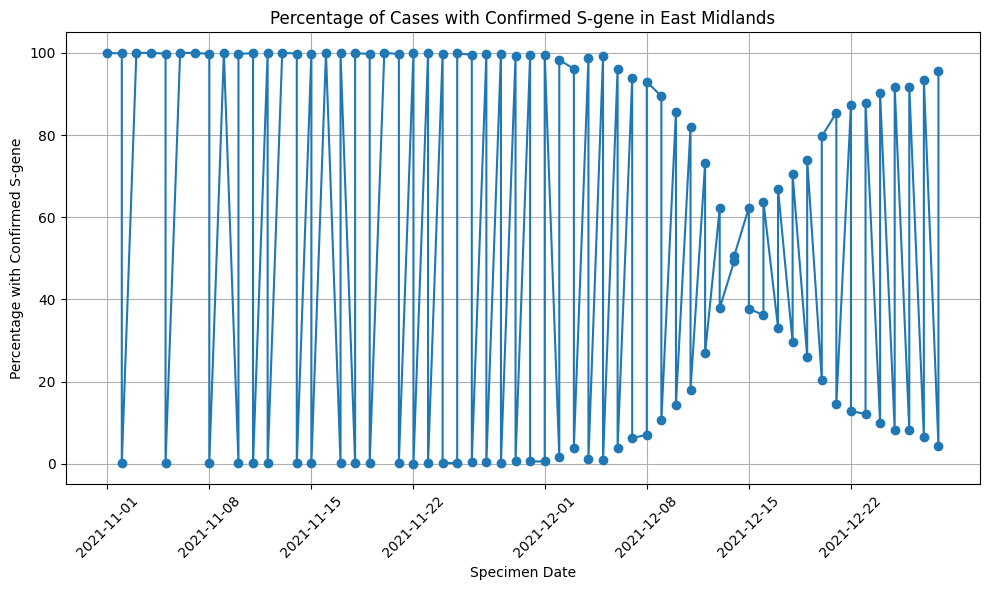

In [7]:
import matplotlib.pyplot as plt

# Choose a specific region for visualization
region_to_visualize = "East Midlands"

# Filter the data for the selected region
region_data = data[data["UKHSA_region"] == region_to_visualize]

# Convert the "specimen_date" column to datetime format for proper sorting
region_data["specimen_date"] = pd.to_datetime(region_data["specimen_date"], format='%d/%m/%Y')

# Sort the data by "specimen_date" for correct time series visualization
region_data = region_data.sort_values(by="specimen_date")

# Create a line plot for the percentage of cases with confirmed S-gene over time
plt.figure(figsize=(10, 6))
plt.plot(region_data["specimen_date"], region_data["percent"], marker='o', linestyle='-')
plt.xlabel("Specimen Date")
plt.ylabel("Percentage with Confirmed S-gene")
plt.title(f"Percentage of Cases with Confirmed S-gene in {region_to_visualize}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert the "sgtf" column to binary labels (1: Cases with confirmed S-gene, 0: Cases with confirmed SGTF)
data["sgtf_label"] = data["sgtf"].map({"Cases with confirmed S-gene": 1, "Cases with confirmed SGTF": 0})

# Select the features for the machine learning model
X = data[["n", "percent", "total"]]
y = data["sgtf_label"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the machine learning model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix for additional evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8994708994708994
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        85
           1       0.91      0.90      0.91       104

    accuracy                           0.90       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.90      0.90      0.90       189

Confusion Matrix:
[[76  9]
 [10 94]]


In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select the features for the RNN model
X = data[["n", "percent", "total"]].values
y = data["sgtf_label"].values

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to be 3D for LSTM (number of samples, timesteps, number of features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize the RNN model
model = Sequential()

# Add LSTM layer to the model
model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
19/19 [==============================] - 4s 35ms/step - loss: 0.6764 - accuracy: 0.7794 - val_loss: 0.6688 - val_accuracy: 0.7881
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 0.6540 - accuracy: 0.8159 - val_loss: 0.6493 - val_accuracy: 0.7881
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.6293 - accuracy: 0.8143 - val_loss: 0.6262 - val_accuracy: 0.7881
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 0.5992 - accuracy: 0.8143 - val_loss: 0.5979 - val_accuracy: 0.7881
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 0.5634 - accuracy: 0.8143 - val_loss: 0.5655 - val_accuracy: 0.7881
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 0.5233 - accuracy: 0.8143 - val_loss: 0.5310 - val_accuracy: 0.7881
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 0.4816 - accuracy: 0.8176 - val_loss: 0.4982 - val_accuracy: 0.8013
Epoch 8/10
19/19 [=

6/6 [==============================] - 0s 4ms/step - loss: 0.3636 - accuracy: 0.8413
Test Loss: 0.3635774254798889
Test Accuracy: 0.841269850730896


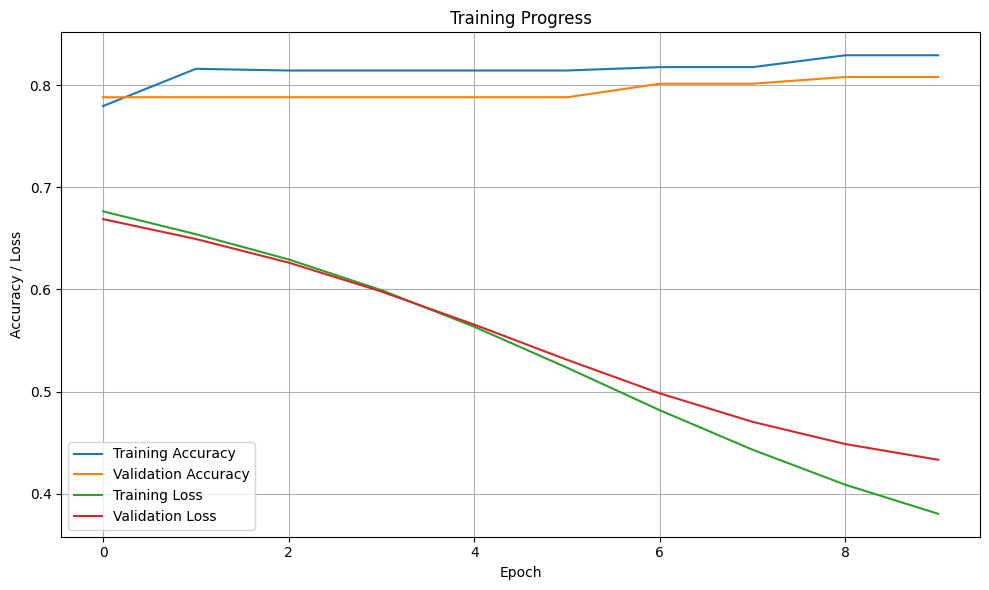

In [10]:
import matplotlib.pyplot as plt

# Evaluate the RNN model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot the training progress
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# # Example of making predictions on new data


# # Below is example of making predictions on new data with "Cases with confirmed with S-gene" variant
# # Replace the examples below with your own data for prediction
# new_data = np.array([[100, 99.5, 1000]])  # Example new data for prediction
# new_data = scaler.transform(new_data)  # Normalize the new data using the same scaler

# # Reshape the new data to fit the RNN model
# new_data = np.reshape(new_data, (new_data.shape[0], 1, new_data.shape[1]))

# # Make predictions on the new data
# predictions = model.predict(new_data)

# # Convert the predictions to binary labels (1 or 0)
# binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

# # Interpret the results
# if binary_predictions[0] == 1:
#     print("The RNN model predicts Cases with confirmed S-gene for the given data.")
# else:
#     print("The RNN model predicts Cases with confirmed SGTF for the given data.")


# Example of making predictions on new data with "Cases with confirmed SGTF" variant
# Replace the examples below with your own data for prediction
new_data_sgtf = np.array([[200, 5.2, 500]])  # Example new data with "Cases with confirmed SGTF" variant
new_data_sgtf = scaler.transform(new_data_sgtf)  # Normalize the new data using the same scaler

# Reshape the new data to fit the RNN model
new_data_sgtf = np.reshape(new_data_sgtf, (new_data_sgtf.shape[0], 1, new_data_sgtf.shape[1]))

# Make predictions on the new data with "Cases with confirmed SGTF" variant
predictions_sgtf = model.predict(new_data_sgtf)

# Convert the predictions to binary labels (1 or 0)
binary_predictions_sgtf = [1 if pred >= 0.5 else 0 for pred in predictions_sgtf]

# Interpret the results
if binary_predictions_sgtf[0] == 1:
    print("The RNN model predicts Cases with confirmed S-gene for the given data with SGTF variant.")
else:
    print("The RNN model predicts Cases with confirmed SGTF for the given data with SGTF variant.")


1/1 [==============================] - 0s 44ms/step
The RNN model predicts Cases with confirmed SGTF for the given data with SGTF variant.
